In [94]:
import pandas as pd
import numpy as np
from scipy.stats import stats, chi2_contingency
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pingouin as pg

In [127]:
def find_related_group(df, features, corr_threshold=0.6):
    """Identifies a group of features that are correlated above a threshold.

    Args:
        df (pandas.DataFrame): The DataFrame containing the features.
        features (list): A list of feature names to start with.
        corr_threshold (float): The minimum correlation for inclusion in the group.

    Returns:
        list: A list of correlated feature names (including the starting features).
    """
    related = set(features)  # Start with the original features
    corr_matrix = df[features].corr()  # Calculate correlation matrix

    # Loop through each feature in the list
    for feat in features:
        # Loop through all other features to check correlation
        for f in corr_matrix.columns:
            # Skip if same feature or already in related set
            if f == feat or f in related:
                continue
            # Check correlation against current feature
            if abs(corr_matrix.loc[feat, f]) >= corr_threshold:
                related.add(f)  # Add correlated feature to set

    return list(related)  # Convert set back to list and return


In [128]:
def point_biserial_correlation(categorical, numerical):
    """Calculates the point-biserial correlation coefficient.

    Args:
        categorical (array-like): Binary categorical variable.
        numerical (array-like): Continuous numerical variable.

    Returns:
        float: Point-biserial correlation coefficient.
    """

    corr, p_value = pointbiserialr(categorical, numerical)
    return corr  

In [129]:
def analyze_correlation(df, feature1, feature2):
    """
    Performs correlation analysis between two numerical features.

    Args:
        df (pandas.DataFrame): The DataFrame containing the features.
        feature1 (str): Name of the first feature.
        feature2 (str): Name of the second feature.

    Returns:
        dict: A dictionary containing correlation results.
    """

    # Data extraction and basic checks
    data1 = df[feature1]
    data2 = df[feature2]

    if not pd.api.types.is_numeric_dtype(data1) or not pd.api.types.is_numeric_dtype(data2):
        print("Error: Both features must be numeric.")
        return None

    # Correlation, Visualization, and Regression
    correlation, p_value = stats.pearsonr(data1, data2)

    print(f"Pearson's Correlation Coefficient: {correlation:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("The correlation is statistically significant.")

        # Scatter Plot with Regression Line 
        plt.scatter(data1, data2)
        m, c = np.polyfit(data1, data2, 1)  
        plt.plot(data1, m * data1 + c, color='red')  
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f"Correlation between {feature1} and {feature2}")
        plt.show()

    # Hypothesis based on strength 
    if abs(correlation) >= 0.8:
        print("The correlation is strong. Consider linear regression.")
    else:
        print("The correlation is moderate or weak. Explore curve fitting.")

    return {
        "feature1": feature1,
        "feature2": feature2,
        "correlation": correlation,
        "p_value": p_value,
        "strength": "strong" if abs(correlation) >= 0.8 else "moderate_or_weak"
    }


In [130]:
df = pd.read_csv('supermarket_sales.csv')

Pearson's Correlation Coefficient: 0.6340
p-value: 0.0000
The correlation is statistically significant.


/tmp/ipykernel_67185/321148082.py:23: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  correlation, p_value = stats.pearsonr(data1, data2)


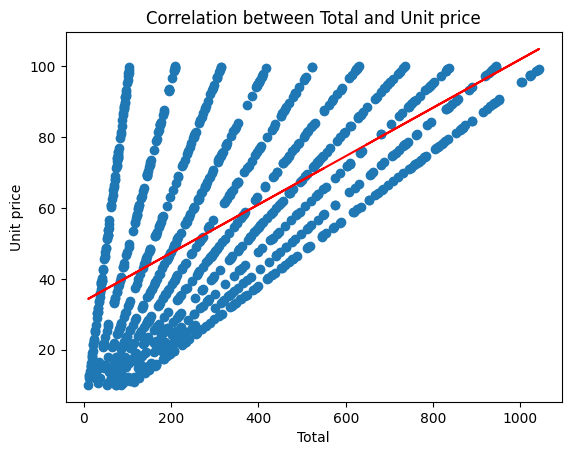

The correlation is moderate or weak. Explore curve fitting.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original correlation analysis:
{'feature1': 'Total', 'feature2': 'Unit price', 'correlation': 0.6339620885890692, 'p_value': 1.6099520923645658e-113, 'strength': 'moderate_or_weak'}

Additional insights:
Correlation results:
{'feature1': 'Total', 'feature2': 'Unit price', 'correlation': 0.6339620885890692, 'p_value': 1.6099520923645658e-113, 'strength': 'moderate_or_weak'} } });

We've got this handy way of getting your revenue from all the different sources:

var m_stats = new m_stats(); var p = m


In [133]:
# Perform correlation analysis
correlation_results = analyze_correlation(df, 'Total', 'Unit price')

# Prepare input data for NLP model
input_text = f"Correlation results:\n{correlation_results}"

# Load pre-trained NLP model locally (example using Hugging Face's Transformers library)
from transformers import pipeline

nlp_model = pipeline("text-generation", model="gpt2")

# Generate additional insights using the NLP model
additional_insights = nlp_model(input_text, max_length=100, num_return_sequences=1)[0]['generated_text']

# Combine original text output and additional insights
combined_output = f"Original correlation analysis:\n{correlation_results}\n\nAdditional insights:\n{additional_insights}"

# Print or display the combined output
print(combined_output)


In [134]:
print(combined_output)

Original correlation analysis:
{'feature1': 'Total', 'feature2': 'Unit price', 'correlation': 0.6339620885890692, 'p_value': 1.6099520923645658e-113, 'strength': 'moderate_or_weak'}

Additional insights:
Correlation results:
{'feature1': 'Total', 'feature2': 'Unit price', 'correlation': 0.6339620885890692, 'p_value': 1.6099520923645658e-113, 'strength': 'moderate_or_weak'} } });

We've got this handy way of getting your revenue from all the different sources:

var m_stats = new m_stats(); var p = m
